In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import kstest
import statsmodels.api as sm

import pickle
import json


import warnings
warnings.filterwarnings("ignore")

# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv(r"D:\Python practice\Datasets\linear regression Datasets\Pune_House_Data.csv")
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [7]:
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


# Exploratory Data Analysis

### 1. Area_type

In [8]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df = pd.get_dummies(df,columns=["area_type"])
df.head(5)

,availability,size,society,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1
1,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0
2,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0
3,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh,0,0,0,1
4,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  object 
 1   size                            13304 non-null  object 
 2   society                         7818 non-null   object 
 3   total_sqft                      13320 non-null  object 
 4   bath                            13247 non-null  float64
 5   balcony                         12711 non-null  float64
 6   price                           13320 non-null  float64
 7   site_location                   13319 non-null  object 
 8   area_type_Built-up  Area        13320 non-null  uint8  
 9   area_type_Carpet  Area          13320 non-null  uint8  
 10  area_type_Plot  Area            13320 non-null  uint8  
 11  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), object(5), uint8(

### 2. Availability

In [11]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [12]:
df.groupby(["availability"]).get_group("Ready To Move")

,availability,size,society,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
1,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.0,Ambegaon Budruk,0,0,1,0
2,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.0,Anandnagar,1,0,0,0
3,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.0,Aundh,0,0,0,1
4,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.0,Aundh Road,0,0,0,1
5,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.0,Balaji Nagar,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13314,Ready To Move,3 BHK,SoosePr,1715,3.0,3.0,112.0,Parvati Darshan,0,0,0,1
13315,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0,Pashan,1,0,0,0
13316,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.0,Paud Road,0,0,0,1
13317,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.0,Pirangut,1,0,0,0


In [13]:
df.groupby(["availability"]).get_group("Immediate Possession")

,availability,size,society,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
579,Immediate Possession,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185,Aundh,0,0,1,0
1775,Immediate Possession,NaN,Orana N,2000 - 5634,NaN,NaN,124.000,Kondhwa Khurd,0,0,1,0
2264,Immediate Possession,NaN,NaN,2400,NaN,NaN,460.000,Market yard,0,0,1,0
2809,Immediate Possession,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785,Fergusson College Road,0,0,1,0
2862,Immediate Possession,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800,Satara Road,0,0,1,0
5333,Immediate Possession,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115,Mahatma Gandhi Road,0,0,1,0
6423,Immediate Possession,NaN,SRniaGa,2324,NaN,NaN,26.730,Uruli Devachi,0,0,1,0
6636,Immediate Possession,NaN,S2enste,1500,NaN,NaN,25.490,Bopodi,0,0,1,0
6719,Immediate Possession,NaN,SJowsn,800 - 2660,NaN,NaN,28.545,Warje,0,0,1,0
7680,Immediate Possession,NaN,NaN,5000,NaN,NaN,400.000,Yerawada,0,0,1,0


In [14]:
import regex as re
def pattern(value):
    pat = re.findall(r"^\d{2}-[A-Za-z]{3}$",value)
    if pat:
        return value
    else:
        return 0



In [15]:
df["availability_date\month"] = df["availability"].apply(pattern)

In [16]:
def Immediate_Possession(value):
    if value == "Immediate Possession":
        return 1 
    else:
        return 0
    
Immediate_Possession("Immediate Possession")

1

In [17]:
def Ready_To_Move(value):
    if value == "Ready To Move":
        return 1
    else:
        return 0
    


In [18]:
df["Availability_Ready_To_Move"] = df["availability"].apply(Ready_To_Move)
df["Availability_Immediate_Possession"] = df["availability"].apply(Immediate_Possession)

In [19]:
def date_convert(value):
    try:
        data = pd.to_datetime(value,format="%d-%b")
        month =  data.month
        day = data.day
        return {"month":month,"day":day}
    except:
        return {"month":0,"day":0}
date_convert('17-Oct')   

{'month': 10, 'day': 17}

In [20]:
df["Availability_day"] = df["availability_date\month"].apply(date_convert)
df[["Availability_Month","Availability_Day"]] = df["Availability_day"].apply(pd.Series)

In [21]:
df.head(5)

,availability,size,society,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_date\month,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_day,Availability_Month,Availability_Day
0,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1,19-Dec,0,0,"{'month': 12, 'day': 19}",12,19
1,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0,0,1,0,"{'month': 0, 'day': 0}",0,0
2,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0,0,1,0,"{'month': 0, 'day': 0}",0,0
3,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh,0,0,0,1,0,1,0,"{'month': 0, 'day': 0}",0,0
4,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1,0,1,0,"{'month': 0, 'day': 0}",0,0


In [22]:
df.drop(["availability","availability_date\month","Availability_day"],axis=1,inplace=True)

In [23]:
df["Availability_Immediate_Possession"].value_counts()

0    13304
1       16
Name: Availability_Immediate_Possession, dtype: int64

In [24]:
df["Availability_Immediate_Possession"].isna().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   size                               13304 non-null  object 
 1   society                            7818 non-null   object 
 2   total_sqft                         13320 non-null  object 
 3   bath                               13247 non-null  float64
 4   balcony                            12711 non-null  float64
 5   price                              13320 non-null  float64
 6   site_location                      13319 non-null  object 
 7   area_type_Built-up  Area           13320 non-null  uint8  
 8   area_type_Carpet  Area             13320 non-null  uint8  
 9   area_type_Plot  Area               13320 non-null  uint8  
 10  area_type_Super built-up  Area     13320 non-null  uint8  
 11  Availability_Ready_To_Move         13320 non-null  int

### 3. Size

In [26]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [27]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   size                               13304 non-null  object 
 1   society                            7818 non-null   object 
 2   total_sqft                         13320 non-null  object 
 3   bath                               13247 non-null  float64
 4   balcony                            12711 non-null  float64
 5   price                              13320 non-null  float64
 6   site_location                      13319 non-null  object 
 7   area_type_Built-up  Area           13320 non-null  uint8  
 8   area_type_Carpet  Area             13320 non-null  uint8  
 9   area_type_Plot  Area               13320 non-null  uint8  
 10  area_type_Super built-up  Area     13320 non-null  uint8  
 11  Availability_Ready_To_Move         13320 non-null  int

In [29]:
df.isna().sum()

size                                   16
society                              5502
total_sqft                              0
bath                                   73
balcony                               609
price                                   0
site_location                           1
area_type_Built-up  Area                0
area_type_Carpet  Area                  0
area_type_Plot  Area                    0
area_type_Super built-up  Area          0
Availability_Ready_To_Move              0
Availability_Immediate_Possession       0
Availability_Month                      0
Availability_Day                        0
dtype: int64

In [30]:
#  Dropping the NaN values

df.dropna(subset=["size"],inplace=True)

In [31]:
#   Splitting the Numbers and BHK seperate 

df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [32]:
df.drop("size",axis=1,inplace=True)

In [33]:
df.head(5)

,society,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK
0,Coomee,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1,0,0,12,19,2
1,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0,1,0,0,0,4
2,NaN,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0,1,0,0,0,3
3,Soiewre,1521,3.0,1.0,95.00,Aundh,0,0,0,1,1,0,0,0,3
4,NaN,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1,1,0,0,0,2


### 4. Society

In [34]:
df["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [35]:
df["society"].nunique()

2676

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   society                            7805 non-null   object 
 1   total_sqft                         13304 non-null  object 
 2   bath                               13247 non-null  float64
 3   balcony                            12711 non-null  float64
 4   price                              13304 non-null  float64
 5   site_location                      13303 non-null  object 
 6   area_type_Built-up  Area           13304 non-null  uint8  
 7   area_type_Carpet  Area             13304 non-null  uint8  
 8   area_type_Plot  Area               13304 non-null  uint8  
 9   area_type_Super built-up  Area     13304 non-null  uint8  
 10  Availability_Ready_To_Move         13304 non-null  int64  
 11  Availability_Immediate_Possession  13304 non-null  int

In [37]:
#   Dropping this feature bcuz of lots of unique values

df.drop("society",axis=1,inplace=True)

### 5. Total_sqft

In [38]:
df

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK
0,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1,0,0,12,19,2
1,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0,1,0,0,0,4
2,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0,1,0,0,0,3
3,1521,3.0,1.0,95.00,Aundh,0,0,0,1,1,0,0,0,3
4,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453,4.0,0.0,231.00,Pashan,1,0,0,0,1,0,0,0,5
13316,3600,5.0,NaN,400.00,Paud Road,0,0,0,1,1,0,0,0,4
13317,1141,2.0,1.0,60.00,Pirangut,1,0,0,0,1,0,0,0,2
13318,4689,4.0,1.0,488.00,Prabhat Road,0,0,0,1,0,0,6,18,4


In [39]:

pd.set_option('display.max_rows', None)
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [40]:
df["total_sqft"].nunique()

2110

In [41]:
df["total_sqft"].value_counts().head(20)

1200    843
1100    221
1500    204
2400    195
600     180
1000    172
1350    132
1050    123
1300    117
1250    114
900     112
1400    108
1800    104
1150    101
1600    101
1140     91
2000     82
1450     70
1650     69
800      67
Name: total_sqft, dtype: int64

In [42]:
df["total_sqft"].isna().sum()

0

In [43]:
pd.set_option('display.max_rows', 10)  # pd.reset_option("display") for resetting
df

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK
0,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1,0,0,12,19,2
1,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0,1,0,0,0,4
2,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0,1,0,0,0,3
3,1521,3.0,1.0,95.00,Aundh,0,0,0,1,1,0,0,0,3
4,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453,4.0,0.0,231.00,Pashan,1,0,0,0,1,0,0,0,5
13316,3600,5.0,NaN,400.00,Paud Road,0,0,0,1,1,0,0,0,4
13317,1141,2.0,1.0,60.00,Pirangut,1,0,0,0,1,0,0,0,2
13318,4689,4.0,1.0,488.00,Prabhat Road,0,0,0,1,0,0,6,18,4


In [44]:
df["total_sqft"].isna().sum()

0

In [45]:
#  Found that "total_sqft" this column contains varius pattern to find that using a pattern

pattern = r'(\d+\.?\d*)'

In [46]:
#  Seperated all digits from the values and found out all the pattern availabe in it.

df["total_sqft_str"]=df["total_sqft"].str.replace(pattern,"").str.strip()
df["total_sqft_str"]

0         
1         
2         
3         
4         
        ..
13315     
13316     
13317     
13318     
13319     
Name: total_sqft_str, Length: 13304, dtype: object

In [47]:
# This are the categories present in the total_sqft column

df["total_sqft_str"].value_counts()

             13065
-              193
Sq. Meter       17
Sq. Yards       15
Acres            8
Cents            2
Guntha           2
Perch            1
Grounds          1
Name: total_sqft_str, dtype: int64

In [48]:
#   Creating a Function to find all the pattern replacing it with none value.

import re

def conversion(value):

    try:
        match = re.match(r"([\d\.]+)\s*([\w\s\.]*)",value)
        num = float(match.group(1))
        unit = match.group(2)
        
        if "-" in value:
            df["total_sqft"].drop(value,axis=0,inplace=True)
            return None
        
        elif unit == "Sq. Meter":
            df["total_sqft"].drop(value,axis=0,inplace=True)
            return None
        
        
        elif unit == "Sq. Yards":
            df["total_sqft"].drop(value,axis=0,inplace=True)
            return None
        
        elif unit == "Acres":
            df["total_sqft"].drop(value,axis=0,inplace=True)
            return None
        
        elif unit == "Cents":
            df["total_sqft"].drop(value,axis=0,inplace=True)
            return None
        
        elif unit == "Guntha":
            df["total_sqft"].drop(value,axis=0,inplace=True)
            return None
        
        elif unit == "Perch":
            df["total_sqft"].drop(value,axis=0,inplace=True)
            return None
        
        elif unit == "Grounds":
            df["total_sqft"].drop(value,axis=0,inplace=True)
            return None
        
        else:
            return float(num)
    
    except:
        return None
    
    


In [49]:
#  Applying the above function

df["total_sqft"] = df["total_sqft"].apply(conversion)
df["total_sqft"]

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13304, dtype: float64

In [50]:
df["total_sqft"].isna().sum()

239

In [51]:
df.drop("total_sqft_str",axis=1,inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   total_sqft                         13065 non-null  float64
 1   bath                               13247 non-null  float64
 2   balcony                            12711 non-null  float64
 3   price                              13304 non-null  float64
 4   site_location                      13303 non-null  object 
 5   area_type_Built-up  Area           13304 non-null  uint8  
 6   area_type_Carpet  Area             13304 non-null  uint8  
 7   area_type_Plot  Area               13304 non-null  uint8  
 8   area_type_Super built-up  Area     13304 non-null  uint8  
 9   Availability_Ready_To_Move         13304 non-null  int64  
 10  Availability_Immediate_Possession  13304 non-null  int64  
 11  Availability_Month                 13304 non-null  int

### 6.Site_location

In [53]:
df["site_location"].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [54]:
df["site_location"].value_counts()

Alandi Road             139
Mangalwar peth          139
Jangali Maharaj Road    139
Kalyani Nagar           139
Karve Nagar             139
                       ... 
Sahakar Nagar           137
Warje                   137
Yerawada                137
Satara Road             137
other                     1
Name: site_location, Length: 97, dtype: int64

In [55]:
# Normally square ft per bedroom is 300 (i.e 2bhk apartment is minimum 600 sqft. 

# For example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.

# We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft

In [56]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [57]:
# df.loc[((df["total_sqft"]/df["BHK"]) < 300)].head(10)        instead of below u can also use this

df[df.total_sqft/df.BHK<300].head(10) 

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK,price_per_sqft
9,1020.0,6.0,NaN,370.0,Bhavani Peth,0,0,1,0,1,0,0,0,6,36274.509804
45,600.0,9.0,NaN,200.0,Kondhwa Budruk,0,0,1,0,1,0,0,0,8,33333.333333
58,1407.0,4.0,1.0,150.0,Mundhawa,0,0,1,0,1,0,0,0,6,10660.980810
68,1350.0,7.0,0.0,85.0,Pirangut,0,0,1,0,1,0,0,0,8,6296.296296
70,500.0,3.0,2.0,100.0,Pune Railway Station,0,0,1,0,1,0,0,0,3,20000.000000
78,460.0,1.0,0.0,22.0,Senapati Bapat Road,1,0,0,0,1,0,0,0,2,4782.608696
89,710.0,6.0,3.0,160.0,Viman Nagar,0,0,1,0,1,0,0,0,6,22535.211268
119,276.0,3.0,3.0,23.0,Fatima Nagar,0,0,1,0,1,0,0,0,2,8333.333333
129,950.0,7.0,0.0,115.0,Hadapsar Industrial Estate,0,0,1,0,1,0,0,0,7,12105.263158
149,1034.0,5.0,NaN,185.0,Mangalwar peth,0,0,1,0,1,0,0,0,6,17891.682785


In [58]:
df.shape

(13304, 15)

In [59]:
#  Removing the above dataframe

df = df[~(df.total_sqft/df.BHK<300)]
df.head(5)

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK,price_per_sqft
0,1056.0,2.0,1.0,39.07,Alandi Road,0,0,0,1,0,0,12,19,2,3699.810606
1,2600.0,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0,1,0,0,0,4,4615.384615
2,1440.0,2.0,3.0,62.00,Anandnagar,1,0,0,0,1,0,0,0,3,4305.555556
3,1521.0,3.0,1.0,95.00,Aundh,0,0,0,1,1,0,0,0,3,6245.890861
4,1200.0,2.0,1.0,51.00,Aundh Road,0,0,0,1,1,0,0,0,2,4250.000000


In [60]:
df.shape

(12560, 15)

In [61]:
#here we find that min price per sqft is 267 rs/sqft whereas max is 176470

#this shows a wide variation in property prices.We should remove outliers per location

#using mean and one standard deviation

In [62]:
df.price_per_sqft.describe()

count     12321.000000
mean       6323.355553
std        4185.986202
min         267.829813
25%        4209.541628
50%        5300.000000
75%        6938.483548
max      176470.588235
Name: price_per_sqft, dtype: float64

In [63]:
# for key, subdf in df.groupby('site_location'):
    
# #         Finding mean & std for each group
#         m = np.mean(subdf.price_per_sqft)
#         st = np.std(subdf.price_per_sqft)
#         print(key)
#         print(subdf)
#         print("="*50)
#         print("mean value: ",m)
#         print("std value: ",st)
#         print("="*50)
#         reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]

In [64]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        
        #     Finding mean & std for each group
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        # A new DataFrame called reduced_df is created for each group that only contains rows where the
        # price_per_sqft value is within one standard deviation of the mean for that group

        # The reason for using one standard deviation as the threshold
        # is that it is a common statistical technique for detecting outliers in a dataset.
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [65]:
#  Applying the above function and assigning a new variable

df = remove_pps_outliers(df)

In [66]:
df.shape

(10761, 15)

In [67]:
Location = df["site_location"]


In [68]:
#  Encoding the "site_location" column.

from sklearn.preprocessing import OrdinalEncoder


oe = OrdinalEncoder(dtype=int)
df['site_location'] = oe.fit_transform(df[['site_location']])

In [69]:
categories = oe.categories_

In [70]:
encoder_dict = {category: i for i, category in enumerate(categories[0])}

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10761 entries, 0 to 10760
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   total_sqft                         10761 non-null  float64
 1   bath                               10753 non-null  float64
 2   balcony                            10447 non-null  float64
 3   price                              10761 non-null  float64
 4   site_location                      10761 non-null  int32  
 5   area_type_Built-up  Area           10761 non-null  uint8  
 6   area_type_Carpet  Area             10761 non-null  uint8  
 7   area_type_Plot  Area               10761 non-null  uint8  
 8   area_type_Super built-up  Area     10761 non-null  uint8  
 9   Availability_Ready_To_Move         10761 non-null  int64  
 10  Availability_Immediate_Possession  10761 non-null  int64  
 11  Availability_Month                 10761 non-null  int

# Feature Engineering

## Handling The Missing Values

### 1. Total_sqft 

In [72]:
df.dropna(subset=["total_sqft"],inplace=True)

### 2. Bath

In [73]:
df["bath"].isna().sum()

8

In [74]:
df.describe()

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK,price_per_sqft
count,10761.000000,10753.000000,10447.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.0,10761.000000,10761.000000,10761.000000,10761.000000
mean,1485.752987,2.458012,1.613860,83.633424,47.624663,0.190131,0.006505,0.069231,0.734133,0.789425,0.0,1.531084,3.901496,2.565654,5389.808120
std,845.835223,0.953499,0.780795,65.483766,27.727466,0.392423,0.080394,0.253859,0.441815,0.407736,0.0,3.392259,7.571491,0.890463,1616.337463
min,300.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1379.310345
25%,1105.000000,2.000000,1.000000,48.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,2.000000,4182.509506
50%,1277.000000,2.000000,2.000000,65.000000,48.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,2.000000,5116.279070
75%,1622.000000,3.000000,2.000000,95.050000,72.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,3.000000,6344.410876
max,30400.000000,16.000000,3.000000,2100.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,12.000000,22.000000,16.000000,17548.524329


In [75]:
median = df["bath"].median()

In [76]:
df["bath"].fillna(median,inplace=True)

In [77]:
df["bath"].isna().sum()

0

In [78]:
df["bath"] = df["bath"].astype(int)

### 3.Balcony

In [79]:
df["balcony"].isna().sum()

314

In [80]:
df.describe()

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK,price_per_sqft
count,10761.000000,10761.000000,10447.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.0,10761.000000,10761.000000,10761.000000,10761.000000
mean,1485.752987,2.457671,1.613860,83.633424,47.624663,0.190131,0.006505,0.069231,0.734133,0.789425,0.0,1.531084,3.901496,2.565654,5389.808120
std,845.835223,0.953226,0.780795,65.483766,27.727466,0.392423,0.080394,0.253859,0.441815,0.407736,0.0,3.392259,7.571491,0.890463,1616.337463
min,300.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1379.310345
25%,1105.000000,2.000000,1.000000,48.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,2.000000,4182.509506
50%,1277.000000,2.000000,2.000000,65.000000,48.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,2.000000,5116.279070
75%,1622.000000,3.000000,2.000000,95.050000,72.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,3.000000,6344.410876
max,30400.000000,16.000000,3.000000,2100.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,12.000000,22.000000,16.000000,17548.524329


In [81]:
df["balcony"].fillna(2,inplace=True)

In [82]:
df["balcony"].isna().sum()

0

In [83]:
df["balcony"]=df["balcony"].astype(int)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10761 entries, 0 to 10760
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   total_sqft                         10761 non-null  float64
 1   bath                               10761 non-null  int32  
 2   balcony                            10761 non-null  int32  
 3   price                              10761 non-null  float64
 4   site_location                      10761 non-null  int32  
 5   area_type_Built-up  Area           10761 non-null  uint8  
 6   area_type_Carpet  Area             10761 non-null  uint8  
 7   area_type_Plot  Area               10761 non-null  uint8  
 8   area_type_Super built-up  Area     10761 non-null  uint8  
 9   Availability_Ready_To_Move         10761 non-null  int64  
 10  Availability_Immediate_Possession  10761 non-null  int64  
 11  Availability_Month                 10761 non-null  int

In [85]:
df.shape

(10761, 15)

### Removing outlier from BHK

In [86]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        global bhk_stats
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)

df.shape

(7497, 15)

# Feature Selection

In [87]:
df.head(5)

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK,price_per_sqft
0,1056.0,2,1,39.07,0,0,0,0,1,0,0,12,19,2,3699.810606
1,2894.0,4,1,245.00,0,0,0,1,0,1,0,0,0,4,8465.791292
2,1084.0,2,2,50.00,0,0,0,0,1,1,0,0,0,2,4612.546125
3,1230.0,2,2,80.00,0,0,0,0,1,1,0,0,0,2,6504.065041
4,1750.0,3,2,130.00,0,0,0,0,1,1,0,0,0,3,7428.571429


In [88]:
df["Availability_Immediate_Possession"].isna().sum()

0

In [89]:
df.corr()

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,Availability_Day,BHK,price_per_sqft
total_sqft,1.000000,0.671900,0.229946,0.919740,-0.016364,0.038499,-0.020600,0.155158,-0.124902,0.034985,NaN,-0.031780,-0.037621,0.655363,0.300879
bath,0.671900,1.000000,0.272822,0.637550,-0.007454,0.035556,-0.001231,0.156733,-0.126921,0.034919,NaN,-0.025241,-0.036602,0.895559,0.323679
balcony,0.229946,0.272822,1.000000,0.219846,0.007554,-0.059947,-0.000072,-0.161292,0.151259,0.101273,NaN,-0.085952,-0.101960,0.260826,0.106057
price,0.919740,0.637550,0.219846,1.000000,-0.011901,0.019193,-0.007413,0.193291,-0.133892,0.023485,NaN,-0.024117,-0.025315,0.608644,0.594001
site_location,-0.016364,-0.007454,0.007554,-0.011901,1.000000,0.006306,0.008783,-0.009112,-0.001563,-0.005384,NaN,-0.003261,0.006289,-0.003647,0.003154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Availability_Immediate_Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Availability_Month,-0.031780,-0.025241,-0.085952,-0.024117,-0.003261,-0.114995,0.036457,-0.044757,0.121040,-0.867587,NaN,1.000000,0.868703,-0.048988,-0.009939
Availability_Day,-0.037621,-0.036602,-0.101960,-0.025315,0.006289,-0.136410,0.015683,-0.042149,0.142027,-0.997517,NaN,0.868703,1.000000,-0.062025,0.005518
BHK,0.655363,0.895559,0.260826,0.608644,-0.003647,0.061277,0.008021,0.177589,-0.163900,0.060410,NaN,-0.048988,-0.062025,1.000000,0.322052


<AxesSubplot:>

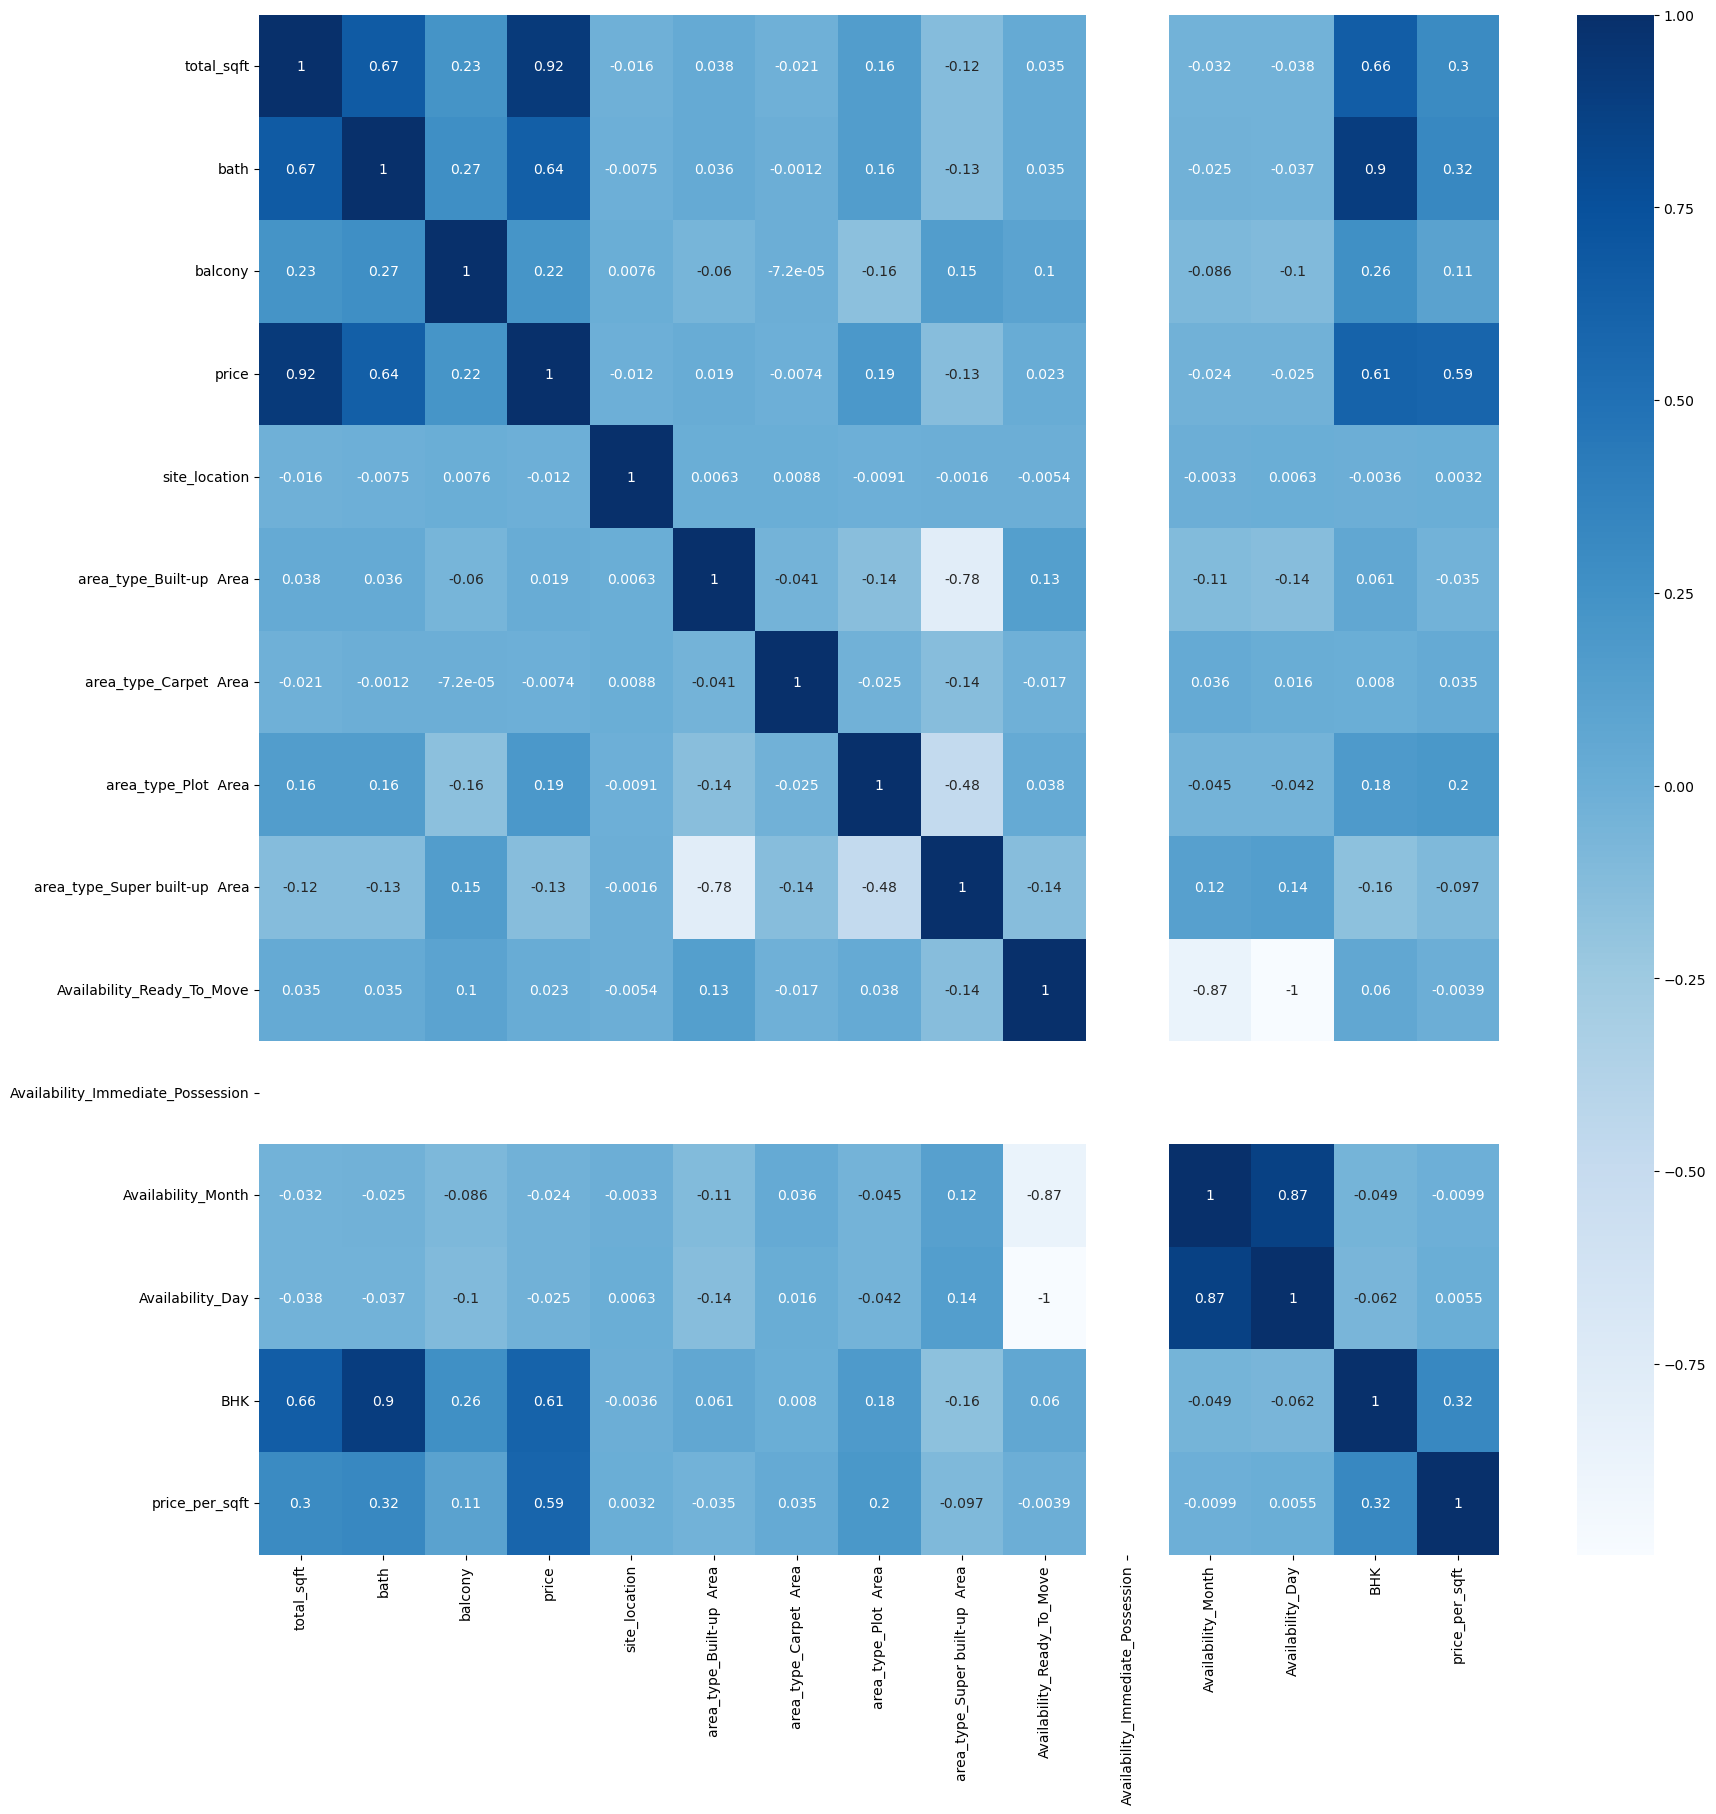

In [90]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

<AxesSubplot:>

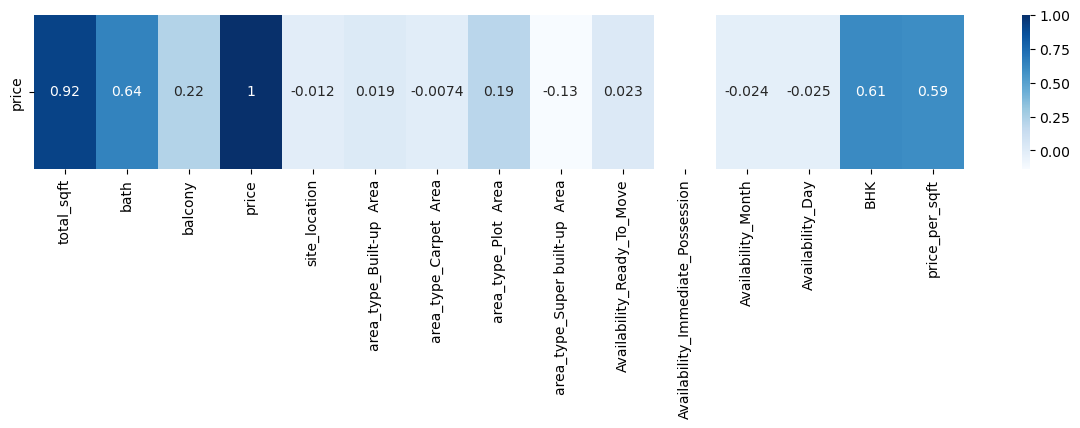

In [91]:
plt.figure(figsize=(15,1))
sns.heatmap(df.corr().head(4).tail(1),annot=True,cmap="Blues")

<AxesSubplot:>

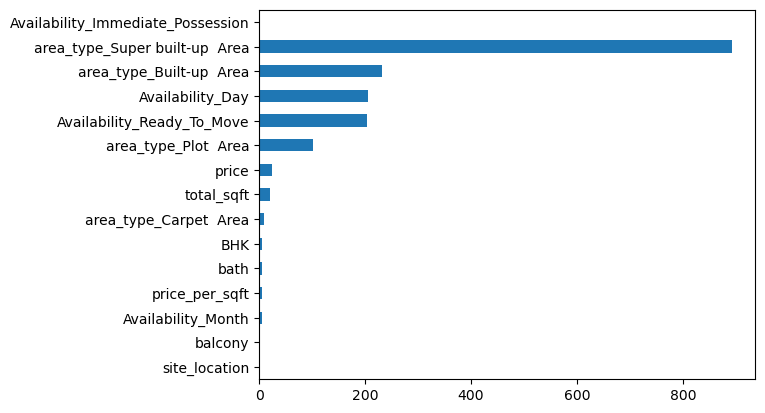

In [92]:
vif_list = []

for i in range(df.shape[1]):
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list,index=df.columns)
s1.sort_values().plot(kind="barh")

In [93]:
df = df.drop(["price_per_sqft","Availability_Day"],axis=1)

In [94]:
model_details = []
Testing_accuracy = []
Training_accuracy = []
best_params_list = []

# Train-Test_split

In [95]:
x = df.drop("price",axis=1)
y = df["price"]

In [96]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Linear Regression Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [97]:
def model_training(x_train, y_train):
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    return linear_model

linear_model = model_training(x_train,y_train)

In [98]:
def model_evalution_training(linear_model, x_train, y_train):
    
    y_pred_train = linear_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(linear_model, x_train, y_train)

Mean squared Error:  840.9261415170778
Root Mean squared Error:  28.998726549920736
Mean Absolute Error:  18.024157608250736
r_squared_value for Training:  0.8402281702093863


In [99]:
def model_evalution_testing(linear_model, x_test, y_test):
    
    y_pred = linear_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(linear_model, x_test, y_test)

Mean squared Error:  665.4006552056434
Root Mean squared Error:  25.795361117953814
Mean Absolute Error:  16.67280755397186
r_squared_value for Testing:  0.8818560396143171


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Training Model

In [101]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [102]:
y_pred = model.predict(x_test)
y_pred

array([ 55.6889521 , 122.96720741,  73.62581011, ..., 103.6638651 ,
        83.31660522, 141.66171395])

In [103]:
y_test

9366     50.80
6065    129.00
5669     66.25
5719     54.00
6798     89.00
         ...  
4184     92.00
2303     20.00
393     110.00
5232     88.00
4595    145.00
Name: price, Length: 1500, dtype: float64

In [104]:
residual = y_test - y_pred
residual

9366    -4.888952
6065     6.032793
5669    -7.375810
5719    -7.639751
6798   -23.445508
          ...    
4184   -20.300663
2303    -3.206987
393      6.336135
5232     4.683395
4595     3.338286
Name: price, Length: 1500, dtype: float64

# Model Evalution

In [105]:
# Model evalution on training data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean squared Error: ",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_train,y_pred_train)
print("r_squared_value for Training: ",r_square)

Mean squared Error:  840.9261415170778
Root Mean squared Error:  28.998726549920736
Mean Absolute Error:  18.024157608250736
r_squared_value for Training:  0.8402281702093863


In [106]:
# Model Evaluation for Testing Data

mse = mean_squared_error(y_test,y_pred)
print("Mean squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean squared Error: ",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_test,y_pred)
print("r_squared_value for Testing: ",r_square)

Mean squared Error:  665.4006552056434
Root Mean squared Error:  25.795361117953814
Mean Absolute Error:  16.67280755397186
r_squared_value for Testing:  0.8818560396143171


# Normality of Residual

In [107]:
Residual = y_train - y_pred_train
Residual

8947   -29.181317
7402    23.313395
2791   -14.280543
2196    -6.665575
2621   -56.001986
          ...    
830     43.631680
8135   -16.014921
1851    -5.232715
2091    39.893772
7078     2.898820
Name: price, Length: 5997, dtype: float64

### 1. Kde



<AxesSubplot:xlabel='price', ylabel='Density'>

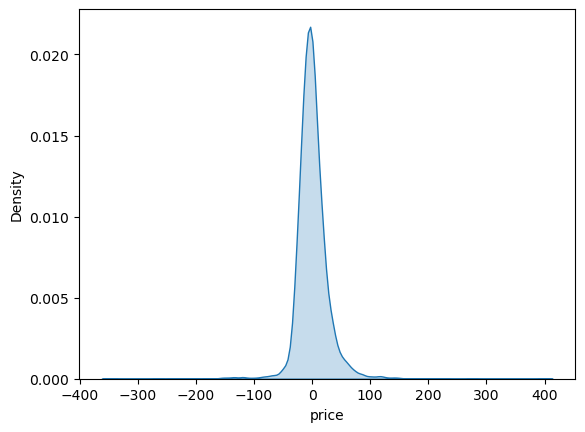

In [108]:
sns.kdeplot(Residual,fill=True)

### 2. Hypothesis Testing

### 2.1 USing Shepiro Test

In [109]:
_,p_val = shapiro(Residual)
p_val


0.0

### 2.2 Normal Test

In [110]:
_, p_val = normaltest(Residual)
p_val

0.0

### 2.3 Ks Test

In [111]:
_,p_val = kstest(Residual,"norm")
p_val

0.0

### 3. QQ Plot

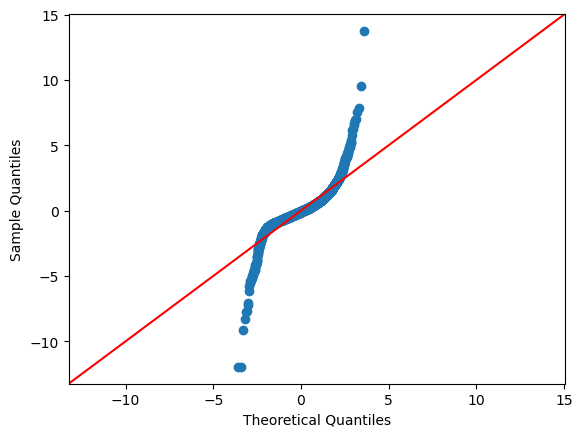

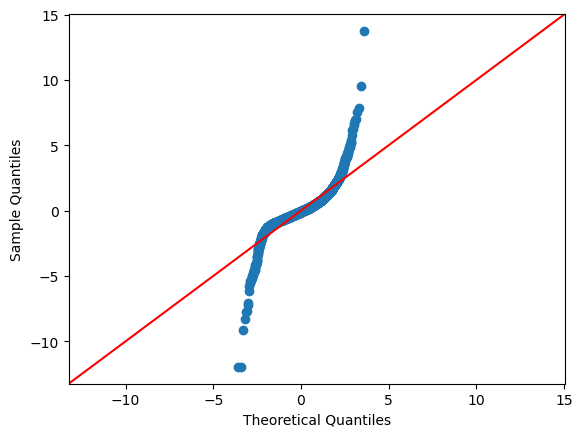

In [112]:
sm.qqplot(Residual,line="45",fit=True)

# Homoscaditity

<AxesSubplot:xlabel='price', ylabel='price'>

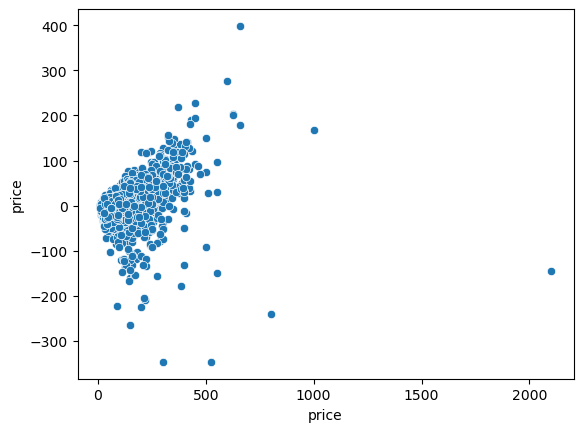

In [113]:
sns.scatterplot(x = y_train, y = Residual)

# Let's Remove the Outliers

In [114]:
df

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,BHK
0,1056.0,2,1,39.07,0,0,0,0,1,0,0,12,2
1,2894.0,4,1,245.00,0,0,0,1,0,1,0,0,4
2,1084.0,2,2,50.00,0,0,0,0,1,1,0,0,2
3,1230.0,2,2,80.00,0,0,0,0,1,1,0,0,2
4,1750.0,3,2,130.00,0,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10747,1165.0,2,1,67.00,95,0,0,0,1,0,0,3,2
10749,3122.0,6,2,250.00,95,0,0,0,1,1,0,0,4
10752,3500.0,6,2,115.00,95,1,0,0,0,1,0,0,6
10755,3210.0,2,2,353.00,95,1,0,0,0,0,0,3,5


### 1. Total_sqft

<AxesSubplot:xlabel='total_sqft'>

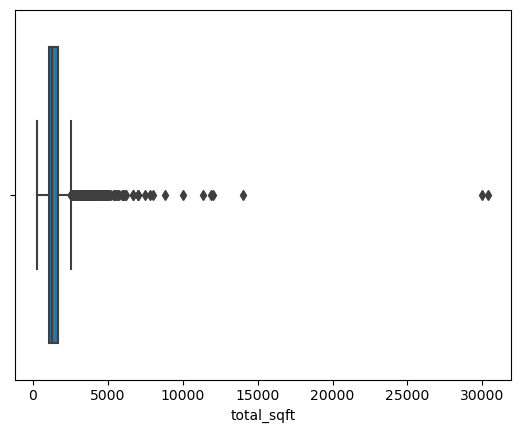

In [115]:
sns.boxplot(x = df["total_sqft"])

In [116]:
q1 = df["total_sqft"].quantile(0.25)
q2 = df["total_sqft"].quantile(0.50)
q3 = df["total_sqft"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2:",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)


value of Q1: 1100.0
value of Q2: 1260.0
value of Q3: 1680.0
--------------------------------------------------
value of Iqr: 580.0
--------------------------------------------------
value of Lower tail: 230.0
value of Upper tail: 2550.0


In [117]:
df.loc[(df["total_sqft"] > upper_tail), "total_sqft"]

1        2894.0
12       2790.0
24       3250.0
29       4500.0
52       7000.0
          ...  
10734    4200.0
10742    3520.0
10749    3122.0
10752    3500.0
10755    3210.0
Name: total_sqft, Length: 547, dtype: float64

In [118]:
df.loc[(df["total_sqft"] > upper_tail), "total_sqft"] = upper_tail

In [119]:
df.loc[(df["total_sqft"] > upper_tail), "total_sqft"]

Series([], Name: total_sqft, dtype: float64)

In [120]:
df.loc[(df["total_sqft"] < lower_tail), "total_sqft"]

Series([], Name: total_sqft, dtype: float64)

In [121]:
df.loc[(df["total_sqft"] < lower_tail), "total_sqft"] = lower_tail

In [122]:
df.loc[(df["total_sqft"] < lower_tail), "total_sqft"] 

Series([], Name: total_sqft, dtype: float64)

<AxesSubplot:xlabel='total_sqft'>

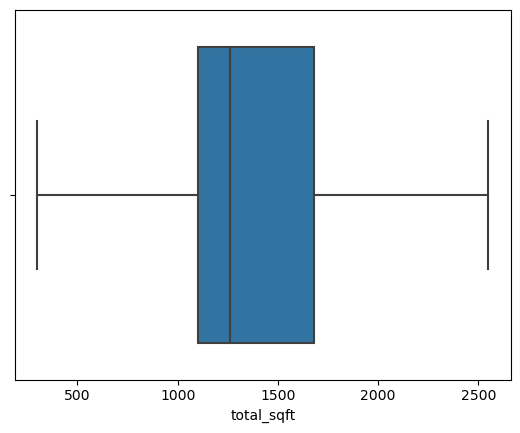

In [123]:
sns.boxplot(x = df["total_sqft"])

### 2. Bath

<AxesSubplot:xlabel='bath'>

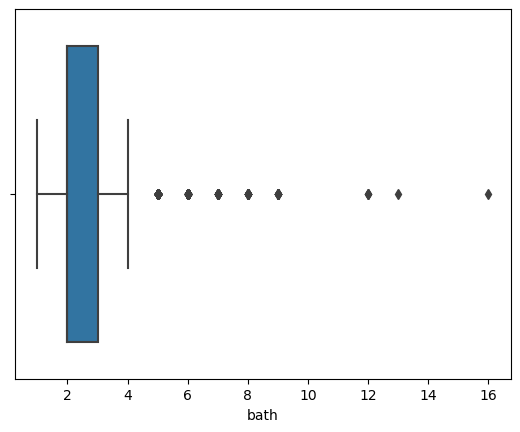

In [124]:
sns.boxplot(x = df["bath"])

In [125]:
q1 = df["bath"].quantile(0.25)
q2 = df["bath"].quantile(0.50)
q3 = df["bath"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2:",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 2.0
value of Q2: 2.0
value of Q3: 3.0
--------------------------------------------------
value of Iqr: 1.0
--------------------------------------------------
value of Lower tail: 0.5
value of Upper tail: 4.5


In [126]:
df.loc[((df["bath"] > df["BHK"]+2))]


,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,BHK
762,1806.0,6,2,116.0,6,0,0,0,1,1,0,0,3
3035,2550.0,9,1,1000.0,27,0,0,0,1,1,0,0,6
4185,2550.0,8,2,450.0,37,1,0,0,0,1,0,0,4


In [127]:
df.drop(df.loc[((df["bath"] > df["BHK"]+2))].index, inplace=True)

In [128]:
df

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,BHK
0,1056.0,2,1,39.07,0,0,0,0,1,0,0,12,2
1,2550.0,4,1,245.00,0,0,0,1,0,1,0,0,4
2,1084.0,2,2,50.00,0,0,0,0,1,1,0,0,2
3,1230.0,2,2,80.00,0,0,0,0,1,1,0,0,2
4,1750.0,3,2,130.00,0,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10747,1165.0,2,1,67.00,95,0,0,0,1,0,0,3,2
10749,2550.0,6,2,250.00,95,0,0,0,1,1,0,0,4
10752,2550.0,6,2,115.00,95,1,0,0,0,1,0,0,6
10755,2550.0,2,2,353.00,95,1,0,0,0,0,0,3,5


In [129]:
df.loc[(df["bath"] > 5) & (df["total_sqft"] <= 1500), "bath"]

8540    6
Name: bath, dtype: int32

In [130]:
df.loc[(df["bath"] > 5) & (df["total_sqft"] <= 2000), "bath"]

1065    6
1582    6
3698    6
4331    6
5655    6
6080    6
8338    6
8540    6
Name: bath, dtype: int32

In [131]:
df.loc[(df["bath"] > 5) & (df["total_sqft"] >= 2000), "bath"]

29       9
133      6
191      6
319      6
394      6
        ..
10496    7
10701    8
10712    6
10749    6
10752    6
Name: bath, Length: 132, dtype: int32

<AxesSubplot:xlabel='bath'>

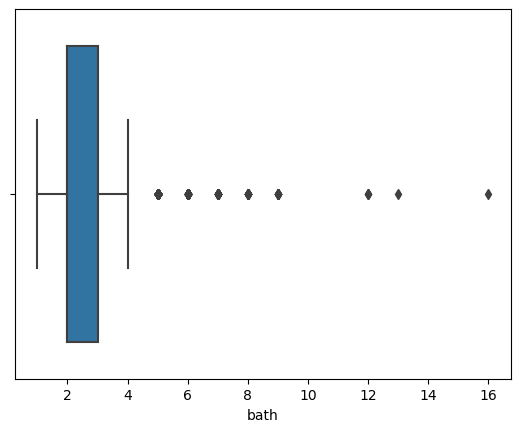

In [132]:
sns.boxplot(x = df["bath"])

In [133]:
df.loc[(df["bath"] > 5),"bath"]

29       9
133      6
191      6
319      6
394      6
        ..
10496    7
10701    8
10712    6
10749    6
10752    6
Name: bath, Length: 139, dtype: int32

### 3. Balcony

<AxesSubplot:xlabel='balcony'>

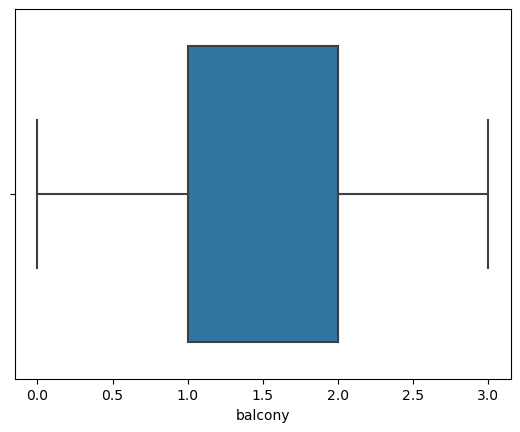

In [134]:
sns.boxplot(x = df["balcony"])

In [135]:
df

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,BHK
0,1056.0,2,1,39.07,0,0,0,0,1,0,0,12,2
1,2550.0,4,1,245.00,0,0,0,1,0,1,0,0,4
2,1084.0,2,2,50.00,0,0,0,0,1,1,0,0,2
3,1230.0,2,2,80.00,0,0,0,0,1,1,0,0,2
4,1750.0,3,2,130.00,0,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10747,1165.0,2,1,67.00,95,0,0,0,1,0,0,3,2
10749,2550.0,6,2,250.00,95,0,0,0,1,1,0,0,4
10752,2550.0,6,2,115.00,95,1,0,0,0,1,0,0,6
10755,2550.0,2,2,353.00,95,1,0,0,0,0,0,3,5


### 4. BHK

<AxesSubplot:xlabel='BHK'>

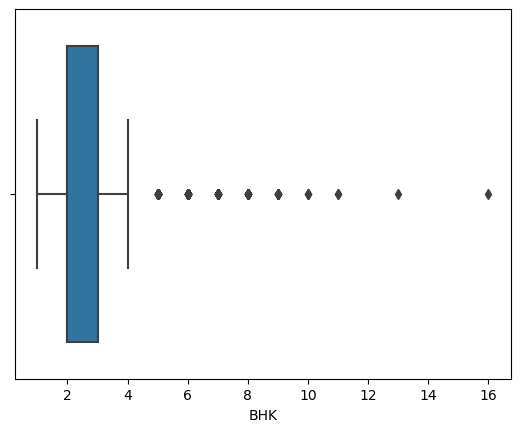

In [136]:
sns.boxplot(x = df["BHK"])

In [137]:
q1 = df["BHK"].quantile(0.25)
q2 = df["BHK"].quantile(0.50)
q3 = df["BHK"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2:",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 2.0
value of Q2: 2.0
value of Q3: 3.0
--------------------------------------------------
value of Iqr: 1.0
--------------------------------------------------
value of Lower tail: 0.5
value of Upper tail: 4.5


<AxesSubplot:xlabel='BHK'>

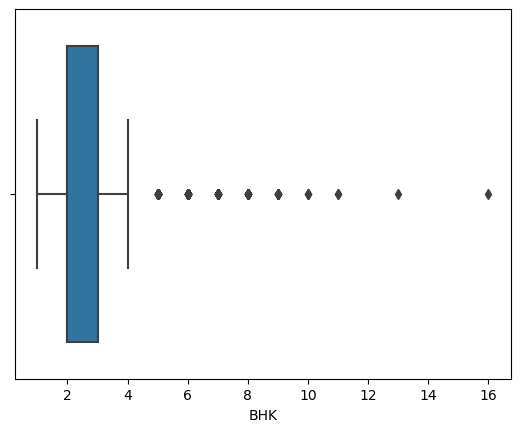

In [138]:
sns.boxplot(x = df["BHK"])

# Now split and Trian The Model

In [139]:
x = df.drop("price",axis=1)
y = df["price"]

In [140]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=100)


In [141]:
model1 = LinearRegression()
model1.fit(x_train1,y_train1)

LinearRegression()

In [142]:
y_pred1 = model1.predict(x_test1)
y_pred1

array([109.57427398, 181.82128438,  86.62093858, ...,  83.12581106,
       105.1962585 , 165.92579807])

In [143]:
y_test1

1783     100.00
1285     170.00
7431      76.00
5238     112.00
10202    125.00
          ...  
444       44.41
4435     135.00
2206      87.00
9023      90.00
7774     155.00
Name: price, Length: 1499, dtype: float64

In [144]:
Residual = y_test1 - y_pred1
Residual

1783     -9.574274
1285    -11.821284
7431    -10.620939
5238    -22.974338
10202   -38.189104
           ...    
444      -7.121023
4435     47.807136
2206      3.874189
9023    -15.196259
7774    -10.925798
Name: price, Length: 1499, dtype: float64

In [145]:
# Model evalution on training data

y_pred_train1 = model1.predict(x_train1)

mse = mean_squared_error(y_train1,y_pred_train1)
print("Mean squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean squared Error: ",rmse)

mae = mean_absolute_error(y_train1,y_pred_train1)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_train1,y_pred_train1)
print("r_squared_value for Training: ",r_square)

Mean squared Error:  2200.484233338572
Root Mean squared Error:  46.90931925895506
Mean Absolute Error:  21.332660022920532
r_squared_value for Training:  0.5918199855678699


In [146]:
# Model Evaluation for Testing Data

mse = mean_squared_error(y_test1,y_pred1)
print("Mean squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean squared Error: ",rmse)

mae = mean_absolute_error(y_test1,y_pred1)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_test1,y_pred1)
print("r_squared_value for Testing: ",r_square)

Mean squared Error:  1337.7596620253823
Root Mean squared Error:  36.57539694966252
Mean Absolute Error:  21.93098970647776
r_squared_value for Testing:  0.7029643763938574


# Now Preforming Hyperparameter Testing

## 1. Ridge Regression Model

### 1. Grid-SearchCV

In [147]:
def get_best_estimator(x_train, y_train):
    
    Ridge_model = Ridge()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    gscv_ridge_model = GridSearchCV(Ridge_model,param_grid,n_jobs=-1)
    gscv_ridge_model.fit(x_train,y_train)
    gscv_ridge_model.best_estimator_
    
    model_details.append("Ridge Regression Hyperp Tunning GSCV")
    
    best_params = gscv_ridge_model.best_params_
    best_params_list.append(best_params)
    
    return gscv_ridge_model.best_estimator_


best_params = get_best_estimator(x_train, y_train)


In [148]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred = ridge_reg_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  665.3125051539815
Root Mean squared Error:  25.79365241981022
Mean Absolute Error:  16.67050575201446
r_squared_value for Testing:  0.8818716909307533


In [149]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred_train = ridge_reg_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)
    

Mean squared Error:  840.9272479132411
Root Mean squared Error:  28.998745626548075
Mean Absolute Error:  18.022800097061722
r_squared_value for Training:  0.8402279599995583


### 2.Randomize SearchCV 

In [150]:
def get_best_estimator(x_train, y_train):
    
    Ridge_model = Ridge()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    rscv_ridge_model = RandomizedSearchCV(Ridge_model,param_grid,n_jobs=-1)
    rscv_ridge_model.fit(x_train,y_train)
    rscv_ridge_model.best_estimator_
    
    model_details.append("Ridge Regression Hyperp Tunning RSCV")
    
    best_params = rscv_ridge_model.best_params_
    best_params_list.append(best_params)
    
    return rscv_ridge_model.best_estimator_


best_params = get_best_estimator(x_train, y_train)


In [151]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred = ridge_reg_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  665.3396597883258
Root Mean squared Error:  25.794178796548763
Mean Absolute Error:  16.67121332909186
r_squared_value for Testing:  0.8818668695407845


In [152]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred_train = ridge_reg_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)
    

Mean squared Error:  840.9266772873949
Root Mean squared Error:  28.998735787744177
Mean Absolute Error:  18.023219787802255
r_squared_value for Training:  0.8402280684156619


## Lasso Regreration Model

### 1. Grid-SearchCV

In [153]:
def get_best_estimator(x_train, y_train):
    
    Lasso_model = Lasso()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    grid_searchcv_lasso_model = GridSearchCV(Lasso_model,param_grid,n_jobs=-1)
    grid_searchcv_lasso_model.fit(x_train,y_train)
    grid_searchcv_lasso_model.best_estimator_
    
    model_details.append("Lasso Regression Hyperp Tunning GSCV")
    
    best_params = grid_searchcv_lasso_model.best_params_
    best_params_list.append(best_params)
    
    return grid_searchcv_lasso_model.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [154]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred = Lasso_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  665.3065483556945
Root Mean squared Error:  25.793536949315317
Mean Absolute Error:  16.6642202762542
r_squared_value for Testing:  0.8818727485788566


In [155]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred_train = Lasso_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending testing accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)

Mean squared Error:  840.9486593999122
Root Mean squared Error:  28.999114803729995
Mean Absolute Error:  18.02041300456537
r_squared_value for Training:  0.8402238919224287


### 2.Randomize SearchCV 

In [156]:
def get_best_estimator(x_train, y_train):
    
    Lasso_model = Lasso()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    random_searchcv_lasso_model = RandomizedSearchCV(Lasso_model,param_grid,n_jobs=-1)
    random_searchcv_lasso_model.fit(x_train,y_train)
    random_searchcv_lasso_model.best_estimator_
    
    model_details.append("Lasso Regression Hyperp Tunning RSCV")
    
    best_params = random_searchcv_lasso_model.best_params_
    best_params_list.append(best_params)
    
    return random_searchcv_lasso_model.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [157]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred = Lasso_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  664.8485751275172
Root Mean squared Error:  25.78465774695327
Mean Absolute Error:  16.55132190463416
r_squared_value for Testing:  0.881954063153022


In [158]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred_train = Lasso_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending testing accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)

Mean squared Error:  845.9815349629716
Root Mean squared Error:  29.08576172224086
Mean Absolute Error:  17.977130615041183
r_squared_value for Training:  0.8392676703256453


# KNN REgressor

In [159]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "KNN Regressor Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [160]:
def model_training(x_train, y_train):
    knn_regg = KNeighborsRegressor()
    knn_regg.fit(x_train, y_train)
    return knn_regg

knn_regg = model_training(x_train,y_train)

In [161]:
def model_evalution_training(knn_regg, x_train, y_train):
    
    y_pred_train = knn_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(knn_regg, x_train, y_train)

Mean squared Error:  1567.2098649266904
Root Mean squared Error:  39.588001527314944
Mean Absolute Error:  16.463066903914594
r_squared_value for Training:  0.7160922421252479


In [162]:
def model_evalution_testing(knn_regg, x_test, y_test):
    
    y_pred = knn_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(knn_regg, x_test, y_test)

Mean squared Error:  1335.7371774279616
Root Mean squared Error:  36.547738335332895
Mean Absolute Error:  20.358861259338312
r_squared_value for Testing:  0.6889043112784694


In [163]:
print(model_details) 
print(Testing_accuracy)
print(Training_accuracy)
print(best_params_list) 

['Linear Regression Regular Model', 'Ridge Regression Hyperp Tunning GSCV', 'Ridge Regression Hyperp Tunning RSCV', 'Lasso Regression Hyperp Tunning GSCV', 'Lasso Regression Hyperp Tunning RSCV', 'KNN Regressor Regular Model']
[0.8818560396143171, 0.8818716909307533, 0.8818668695407845, 0.8818727485788566, 0.881954063153022, 0.6889043112784694]
[0.8402281702093863, 0.8402279599995583, 0.8402280684156619, 0.8402238919224287, 0.8392676703256453, 0.7160922421252479]
[{'alpha': 2.91}, {'alpha': 2.01}, {'alpha': 0.01}, {'alpha': 0.31000000000000005}]


# Scaling

### Standardization

In [164]:
std_scalar = StandardScaler()

In [165]:
x_train_exctracted = x_train[["total_sqft"]]

std_scalar.fit(x_train_exctracted) 

array = std_scalar.transform(x_train_exctracted)

scaled_df = pd.DataFrame(array, columns=x_train_exctracted.columns, index = x_train_exctracted.index)

x_train_remaining = x_train.drop(["total_sqft"], axis= 1)

a_df = scaled_df.join(x_train_remaining)

x_train_scaled_df = a_df[x_train.columns]

In [166]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "KNN Regressor Using Standardization"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [167]:
def model_training(x_train_scaled_df, y_train):
    knn_regg_scaled = KNeighborsRegressor()
    knn_regg_scaled.fit(x_train_scaled_df, y_train)
    return knn_regg_scaled

knn_regg_scaled = model_training(x_train_scaled_df,y_train)

In [168]:
def model_evalution_training(knn_regg_scaled, x_train_scaled_df, y_train):
    
    y_pred_train = knn_regg_scaled.predict(x_train_scaled_df)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(knn_regg_scaled, x_train_scaled_df, y_train)

Mean squared Error:  1828.1139261622777
Root Mean squared Error:  42.75644894237918
Mean Absolute Error:  18.669730960854093
r_squared_value for Training:  0.6688281910855504


In [169]:
x_test_exctracted = x_test[["total_sqft"]]

std_scalar.fit(x_test_exctracted) 

array = std_scalar.transform(x_test_exctracted)

scaled_df = pd.DataFrame(array, columns=x_test_exctracted.columns, index = x_test_exctracted.index)

x_test_remaining = x_test.drop(["total_sqft"], axis= 1)

a_df = scaled_df.join(x_test_remaining)

x_test_scaled_df = a_df[x_test.columns]


In [170]:
def model_evalution_testing(knn_regg_scaled, x_test_scaled_df, y_test):
    
    y_pred = knn_regg_scaled.predict(x_test_scaled_df)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(knn_regg_scaled, x_test_scaled_df, y_test)

Mean squared Error:  1667.8651899807899
Root Mean squared Error:  40.83950526121478
Mean Absolute Error:  23.277506937033085
r_squared_value for Testing:  0.6115510755110927


### Normalization

In [171]:
normal_scalar = MinMaxScaler()

In [172]:
x_train_exctracted = x_train[["total_sqft"]]

normal_scalar.fit(x_train_exctracted) 

array = normal_scalar.transform(x_train_exctracted)

scaled_df = pd.DataFrame(array, columns=x_train_exctracted.columns, index = x_train_exctracted.index)

x_train_remaining = x_train.drop(["total_sqft"], axis= 1)

a_df = scaled_df.join(x_train_remaining)

x_train_norm_scaled = a_df[x_train.columns]


In [173]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "KNN Regressor Using Normalization"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [174]:
def model_training(x_train_norm_scaled, y_train):
    knn_regg_norm_scaled = KNeighborsRegressor()
    knn_regg_norm_scaled.fit(x_train_norm_scaled, y_train)
    return knn_regg_norm_scaled

knn_regg_norm_scaled = model_training(x_train_norm_scaled,y_train)

In [175]:
def model_evalution_training(knn_regg_norm_scaled, x_train_norm_scaled, y_train):
    
    y_pred_train = knn_regg_norm_scaled.predict(x_train_norm_scaled)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(knn_regg_norm_scaled, x_train_norm_scaled, y_train)

Mean squared Error:  2088.6520369217083
Root Mean squared Error:  45.70177279845617
Mean Absolute Error:  21.016839501779362
r_squared_value for Training:  0.6216304337704547


In [176]:
x_test_exctracted = x_test[["total_sqft"]]

std_scalar.fit(x_test_exctracted) 

array = std_scalar.transform(x_test_exctracted)

scaled_df = pd.DataFrame(array, columns=x_test_exctracted.columns, index = x_test_exctracted.index)

x_test_remaining = x_test.drop(["total_sqft"], axis= 1)

a_df = scaled_df.join(x_test_remaining)

x_test_norm_scaled = a_df[x_test.columns]


In [177]:
def model_evalution_testing(knn_regg_norm_scaled, x_test_norm_scaled, y_test):
    
    y_pred = knn_regg_norm_scaled.predict(x_test_norm_scaled)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(knn_regg_norm_scaled, x_test_norm_scaled, y_test)

Mean squared Error:  2254.3068901131264
Root Mean squared Error:  47.47954180605713
Mean Absolute Error:  27.410266808964778
r_squared_value for Testing:  0.4749677059076559


# Hyperparameter Tunning for KNN regressor

In [178]:
def get_best_estimator(x_train_scaled_df, y_train):
    
    knn_regg_hyp = KNeighborsRegressor()
    
    # param_grid
    param_grid = {"n_neighbors" : np.arange(3,30),"p": [1,2]} 
    
    gscv_knn_regg = GridSearchCV(knn_regg_hyp, param_grid,cv=5)
    gscv_knn_regg.fit(x_train_scaled_df, y_train) 
    gscv_knn_regg.best_estimator_

    model_details.append("KNN Regressor Hyperp Tunning")
    
    best_params = gscv_knn_regg.best_params_
    best_params_list.append(best_params)
    
    return gscv_knn_regg.best_estimator_

best_params = get_best_estimator(x_train_scaled_df, y_train)

In [179]:
def get_hyp_testing_accuracy(best_params, x_test_scaled_df, y_test):
    
    # To get best model from hyperparameter tunning
    knn_regg_hyp = best_params
    
    y_pred = knn_regg_hyp.predict(x_test_scaled_df)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test_scaled_df, y_test)

Mean squared Error:  1586.3442157322
Root Mean squared Error:  39.82893691441186
Mean Absolute Error:  22.781344336026834
r_squared_value for Testing:  0.630537462996353


In [180]:
def get_hyp_training_accuracy(best_params, x_train_scaled_df, y_train):
    
    # To get best model from hyperparameter tunning
    knn_regg_hyp = best_params
    
    y_pred_train = knn_regg_hyp.predict(x_train_scaled_df)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train_scaled_df, y_train)
    

Mean squared Error:  2266.437992634814
Root Mean squared Error:  47.60712123868459
Mean Absolute Error:  20.98951614133198
r_squared_value for Training:  0.5894236354355751


# Decision Tree

In [181]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Decision Tree Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [182]:
def model_training(x_train, y_train):
    dt_regg = DecisionTreeRegressor()
    dt_regg.fit(x_train, y_train)
    return dt_regg

dt_regg = model_training(x_train,y_train)

In [183]:
def model_evalution_training(dt_regg, x_train, y_train):
    
    y_pred_train = dt_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(dt_regg, x_train, y_train)

Mean squared Error:  11.643974881376037
Root Mean squared Error:  3.4123269013059163
Mean Absolute Error:  0.31098102016607354
r_squared_value for Training:  0.9978906368092086


In [184]:
def model_evalution_testing(dt_regg, x_test, y_test):
    
    y_pred = dt_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(dt_regg, x_test, y_test)

Mean squared Error:  1543.3235749066168
Root Mean squared Error:  39.2851571831731
Mean Absolute Error:  23.152974919957312
r_squared_value for Testing:  0.6405570507663417


# Hyperparameter Tunning (Pre-prunning)

In [185]:
def get_best_estimator(x_train, y_train):
    
    dt_model = DecisionTreeRegressor(random_state=10)
    
    hyperparameter = {"criterion":['squared_error', 'absolute_error'], 
                      "max_depth": np.arange(3,8),
                      "min_samples_split": np.arange(2,20),
                      "min_samples_leaf": np.arange(2,15)} 
    
    rscv_dt_regg = RandomizedSearchCV(dt_model, hyperparameter, cv=5)
    rscv_dt_regg.fit(x_train, y_train)
    rscv_dt_regg.best_estimator_

    model_details.append("Decision Tree Hyperp Tunning(pre-prunning)")
    
    best_params = rscv_dt_regg.best_params_
    best_params_list.append(best_params)
    
    return rscv_dt_regg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [186]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    dt_model = best_params
    
    y_pred = dt_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  970.4491704375666
Root Mean squared Error:  31.152033166995164
Mean Absolute Error:  17.63026680896478
r_squared_value for Testing:  0.773980571815899


In [187]:
dt_model = best_params

In [188]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = dt_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  2011.4240332918148
Root Mean squared Error:  44.84890225291824
Mean Absolute Error:  17.327613879003557
r_squared_value for Training:  0.635620665612654


# Post Prunning

In [189]:
result = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
# ccp_alpha_list

In [190]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeRegressor(ccp_alpha=i, random_state=11)
    decision_tree_model.fit(x_train, y_train)
    
    training_accuracy = decision_tree_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_accuracy = decision_tree_model.score(x_test, y_test)
    test_accuracy_list.append(testing_accuracy)

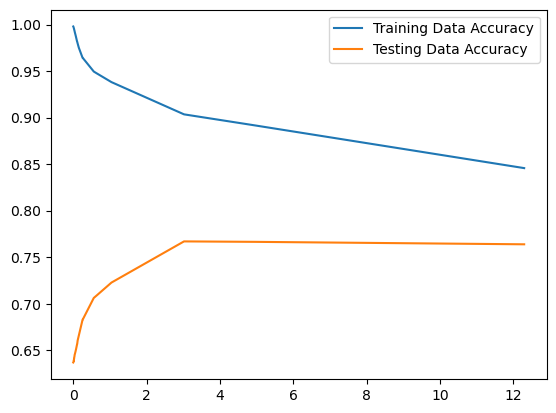

In [191]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()

In [192]:
max_test = test_accuracy_list.index(max(test_accuracy_list))
max_test

27

In [193]:
best_ccp = ccp_alpha_list[max_test]
best_ccp

3.0210498220640662

In [194]:
decision_tree_model = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=11)

decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=3.0210498220640662, random_state=11)

In [195]:
def get_hyp_testing_accuracy(x_test, y_test):
    
    model_details.append("Decision Tree Hyperp Tunning(post-prunning)")
    
    y_pred = decision_tree_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(x_test, y_test)

Mean squared Error:  1000.7115662878895
Root Mean squared Error:  31.634025451843613
Mean Absolute Error:  18.573191086441053
r_squared_value for Testing:  0.7669324031802487


In [196]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = decision_tree_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  532.9221751261961
Root Mean squared Error:  23.08510721495995
Mean Absolute Error:  15.670522636829114
r_squared_value for Training:  0.9034585327416301


# Random Forest

In [197]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Random Forest Tree Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [198]:
def model_training(x_train, y_train):
    rf_regg = RandomForestRegressor()
    rf_regg.fit(x_train, y_train)
    return rf_regg

rf_regg = model_training(x_train,y_train)

In [199]:
def model_evalution_training(rf_regg, x_train, y_train):
    
    y_pred_train = rf_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(rf_regg, x_train, y_train)

Mean squared Error:  418.93014278841576
Root Mean squared Error:  20.467783045274242
Mean Absolute Error:  7.453068239832232
r_squared_value for Training:  0.9241087487981245


In [200]:
def model_evalution_testing(rf_regg, x_test, y_test):
    
    y_pred = rf_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(rf_regg, x_test, y_test)

Mean squared Error:  950.572781313656
Root Mean squared Error:  30.83136035457495
Mean Absolute Error:  18.18171880228185
r_squared_value for Testing:  0.7786098200454847


# Hyperparameter Tunning (Pre-prunning)

In [201]:
def get_best_estimator(x_train, y_train):
    
    rf_model = RandomForestRegressor(random_state=10, n_jobs=-1)
    
    hyperparameter = {"n_estimators" : np.arange(10,200),
                      "criterion":['squared_error', 'absolute_error'], 
                     "max_depth": np.arange(3,8),
                     "min_samples_split": np.arange(2,20),
                     "min_samples_leaf": np.arange(2,15), 
                     "max_features": ['sqrt', 'log2']
                     } 
    
    rscv_rf_reg = RandomizedSearchCV(rf_model, hyperparameter, cv=5)
    rscv_rf_reg.fit(x_train, y_train)
    rscv_rf_reg.best_estimator_

    model_details.append("Decision Tree Hyperp Tunning")
    
    best_params = rscv_rf_reg.best_params_
    best_params_list.append(best_params)
    
    return rscv_rf_reg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [202]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    rf_model = best_params
    
    y_pred = rf_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  940.8393124615177
Root Mean squared Error:  30.673104056510446
Mean Absolute Error:  18.675735853935084
r_squared_value for Testing:  0.7808767631592761


In [203]:
rf_model = best_params

In [204]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = rf_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  1904.1497510689053
Root Mean squared Error:  43.63656438205127
Mean Absolute Error:  18.64967271996071
r_squared_value for Training:  0.6550539282695058


# AdaBoost

In [205]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "AdaBoost Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [206]:
def model_training(x_train, y_train):
    adb_regg = AdaBoostRegressor()
    adb_regg.fit(x_train, y_train)
    return adb_regg

adb_regg = model_training(x_train,y_train)

In [207]:
def model_evalution_training(adb_regg, x_train, y_train):
    
    y_pred_train = adb_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(adb_regg, x_train, y_train)

Mean squared Error:  1602.899468993301
Root Mean squared Error:  40.036226957510635
Mean Absolute Error:  28.74071929019579
r_squared_value for Training:  0.709626895207295


In [208]:
def model_evalution_testing(adb_regg, x_test, y_test):
    
    y_pred = adb_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(adb_regg, x_test, y_test)

Mean squared Error:  1537.0701445488978
Root Mean squared Error:  39.20548615371193
Mean Absolute Error:  28.696243973087356
r_squared_value for Testing:  0.6420134864011967


# Hyper parameter for adaboost

In [209]:
def get_best_estimator(x_train, y_train):
    
    adb_reg = AdaBoostRegressor(random_state=30)
    
    param_grid = {"n_estimators" : np.arange(10,200,2),
                "learning_rate" : np.arange(0,2,0.001)
                }
    
    rscv_adb_reg = RandomizedSearchCV(adb_reg, param_grid, cv=7)
    rscv_adb_reg.fit(x_train, y_train)
    rscv_adb_reg.best_estimator_

    model_details.append("AdaBoost Hyperp Tunning")
    
    best_params = rscv_adb_reg.best_params_
    best_params_list.append(best_params)
    
    return rscv_adb_reg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [210]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    rf_model = best_params
    
    y_pred = rf_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  1063.6188393186558
Root Mean squared Error:  32.61316972204106
Mean Absolute Error:  20.900312826361883
r_squared_value for Testing:  0.752281181547874


In [211]:
rf_model = best_params

In [212]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = rf_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  1105.6924359480633
Root Mean squared Error:  33.25195386662359
Mean Absolute Error:  20.53130786882461
r_squared_value for Training:  0.799698389211089


# Making Pickle File 

In [213]:
with open("Pune_linear_model.pkl","wb") as f:
    pickle.dump(model,f)

# Taking inputs from user

In [214]:
df.columns

Index(['total_sqft', 'bath', 'balcony', 'price', 'site_location',
       'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'Availability_Ready_To_Move', 'Availability_Immediate_Possession',
       'Availability_Month', 'BHK'],
      dtype='object')

In [215]:
df.shape

(7494, 13)

In [216]:
df.head(1)

,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Availability_Ready_To_Move,Availability_Immediate_Possession,Availability_Month,BHK
0,1056.0,2,1,39.07,0,0,0,0,1,0,0,12,2


In [217]:
column_name = x.columns
Availability_Month = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"July":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}

json_dict = {"site_location":encoder_dict,
             "columns":list(column_name), 
             "Availability":{"Availability_Month":{"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"July":7,
                                                   "Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}}}
json_dict

{'site_location': {'Alandi Road': 0,
  'Ambegaon Budruk': 1,
  'Anandnagar': 2,
  'Aundh': 3,
  'Aundh Road': 4,
  'Balaji Nagar': 5,
  'Baner': 6,
  'Baner road': 7,
  'Bhandarkar Road': 8,
  'Bhavani Peth': 9,
  'Bibvewadi': 10,
  'Bopodi': 11,
  'Budhwar Peth': 12,
  'Bund Garden Road': 13,
  'Camp': 14,
  'Chandan Nagar': 15,
  'Dapodi': 16,
  'Deccan Gymkhana': 17,
  'Dehu Road': 18,
  'Dhankawadi': 19,
  'Dhayari Phata': 20,
  'Dhole Patil Road': 21,
  'Erandwane': 22,
  'Fatima Nagar': 23,
  'Fergusson College Road': 24,
  'Ganesh Peth': 25,
  'Ganeshkhind': 26,
  'Ghorpade Peth': 27,
  'Ghorpadi': 28,
  'Gokhale Nagar': 29,
  'Gultekdi': 30,
  'Guruwar peth': 31,
  'Hadapsar': 32,
  'Hadapsar Industrial Estate': 33,
  'Hingne Khurd': 34,
  'Jangali Maharaj Road': 35,
  'Kalyani Nagar': 36,
  'Karve Nagar': 37,
  'Karve Road': 38,
  'Kasba Peth': 39,
  'Katraj': 40,
  'Khadaki': 41,
  'Khadki': 42,
  'Kharadi': 43,
  'Kondhwa': 44,
  'Kondhwa Budruk': 45,
  'Kondhwa Khurd': 46,


# Making Json File

In [218]:
with open("Pune_data.json","w") as f:
    json.dump(json_dict,f)

In [219]:
total_sqft    = 1000
bath          = 4
balcony       = 2
site_location = "Dhayari Phata"
area_type     = "Super built-up  Area"
Availability  = "Aug"
BHK           = 4

area_type     = "area_type_" + area_type                      


In [220]:
area_type_index = list(column_name).index(area_type)
area_type_index

7

In [221]:
def avail(Availability):
    
    if Availability == "Ready_To_Move":
        test = "Availability_Ready_To_Move"
        avail_result = list(column_name).index(test)
        
    elif Availability == "Immediate_Possession":
            
        test = "Availability_Immediate_Possession"
        avail_result = list(column_name).index(test)
    else:
        avail_result = 0
        
    return avail_result

    
avail_index = avail("Aug")    
avail_index

0

In [222]:
test_array = np.zeros(len(column_name))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [223]:
test_array[0] = total_sqft
test_array[1] = bath
test_array[2] = balcony
test_array[3] = json_dict["site_location"][site_location]
test_array[area_type_index] = 1
test_array[avail_index] = 1 if avail_index > 1 else total_sqft
test_array[-2] = json_dict["Availability"]["Availability_Month"][Availability]
test_array[-1] = BHK

test_array

array([1000.,    4.,    2.,   20.,    0.,    0.,    0.,    1.,    0.,
          0.,    8.,    4.])

In [224]:
price = round(model.predict([test_array])[0])
print(f"The Total Price of your House is: {price} Lakhs only")

The Total Price of your House is: 53 Lakhs only


In [234]:
pd.set_option('display.max_rows', None)

In [237]:
comparison_df = pd.DataFrame({"Model Details":model_details, "Training Accuracy":Training_accuracy,
                              "Testing Accuracy":Testing_accuracy})
comparison_df

,Model Details,Training Accuracy,Testing Accuracy
0,Linear Regression Regular Model,0.840228,0.881856
1,Ridge Regression Hyperp Tunning GSCV,0.840228,0.881872
2,Ridge Regression Hyperp Tunning RSCV,0.840228,0.881867
3,Lasso Regression Hyperp Tunning GSCV,0.840224,0.881873
4,Lasso Regression Hyperp Tunning RSCV,0.839268,0.881954
5,KNN Regressor Regular Model,0.716092,0.688904
6,KNN Regressor Using Standardization,0.668828,0.611551
7,KNN Regressor Using Normalization,0.621630,0.474968
8,KNN Regressor Hyperp Tunning,0.589424,0.630537
9,Decision Tree Regular Model,0.997891,0.640557


In [236]:
comparison_df["Difference_in_%"] = (comparison_df['Training Accuracy'] - comparison_df['Testing Accuracy']) *100
comparison_df

,Model Details,Training Accuracy,Testing Accuracy,Difference_in_%
0,Linear Regression Regular Model,0.840228,0.881856,-4.162787
1,Ridge Regression Hyperp Tunning GSCV,0.840228,0.881872,-4.164373
2,Ridge Regression Hyperp Tunning RSCV,0.840228,0.881867,-4.163880
3,Lasso Regression Hyperp Tunning GSCV,0.840224,0.881873,-4.164886
4,Lasso Regression Hyperp Tunning RSCV,0.839268,0.881954,-4.268639
5,KNN Regressor Regular Model,0.716092,0.688904,2.718793
6,KNN Regressor Using Standardization,0.668828,0.611551,5.727712
7,KNN Regressor Using Normalization,0.621630,0.474968,14.666273
8,KNN Regressor Hyperp Tunning,0.589424,0.630537,-4.111383
9,Decision Tree Regular Model,0.997891,0.640557,35.733359
